In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns
%matplotlib inline


In [2]:
def proccess_dataset(name):
    dataset = pd.read_csv(name, header=None, skipinitialspace=True)
    dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                      'marital-status', 'occupation', 'relationship', 'race',
                      'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
#     for c in ['fnlwgt','hours-per-week']: 
#         dataset = dataset.drop(c, 1)

    dataset['income'] = dataset['income'].str.strip()
    dataset['income'] = dataset['income'].str.strip('.')
    dataset['income'] = dataset['income'].map(lambda x: 0 if x == '<=50K' else 1)

    return dataset

In [3]:
def proccess_train_test(train, test):
    train_y = train[['income']]
    test_y = test[['income']]
    train_test_x = pd.concat([train.ix[:,:'native-country'], test.ix[:,:'native-country']])
    train_test_x = pd.get_dummies(train_test_x)
#     for x in train_test_x.columns:
#         print(x)
    return train_test_x.head(len(train)), train_y, train_test_x.tail(len(test)), test_y

In [4]:
train = proccess_dataset('adult.data.txt')
test = proccess_dataset('adult.test.txt')
train_X, train_y, test_X, test_y = proccess_train_test(train, test)

In [5]:
print(len(train_X), len(train_y), len(test_X), len(test_y))

32561 32561 16281 16281


In [12]:
from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

# model = tree.DecisionTreeClassifier()

# model = GradientBoostingClassifier(
#     n_estimators=100, learning_rate=1, random_state=0)

model = AdaBoostClassifier(n_estimators=900)
print(model)

model.fit(train_X, train_y)
pred = model.predict(test_X)
print(accuracy_score(pred, test_y))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=900, random_state=None)


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.871322400344


In [7]:
# model = AdaBoostClassifier(n_estimators=500)

# predicted = cross_val_predict(model, train_X, train_y['income'], cv=10)
# metrics.accuracy_score(train_y['income'], predicted) 
pred

array([0, 0, 0, ..., 1, 0, 1])

In [8]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_X, train_y)
dvalid = xgb.DMatrix(test_X, test_y)

print("# Num of Features: ", train_X.shape[1])

params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eta": 0.25,
}

gbm = xgb.train(params, dtrain, 40)

ypred_bst = np.array(gbm.predict(xgb.DMatrix(test_X)))
ypred_bst = ypred_bst > 0.5
ypred_bst = ypred_bst.astype(int)
print(accuracy_score(ypred_bst, test_y))

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Num of Features:  108
0.878078742092


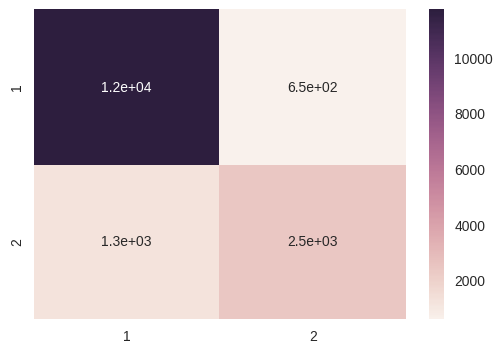

In [9]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y['income'], ypred_bst)
np.set_printoptions(precision=2)

df_cm = pd.DataFrame(cnf_matrix, index = [str(x) for x in range(1, 3)],
                  columns = [str(x) for x in range(1, 3)])
sns.heatmap(df_cm, annot=True)

In [10]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import np_utils
# from keras.optimizers import SGD
# from keras.layers.advanced_activations import PReLU

# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(150, input_dim=train_X.shape[1], init='normal', activation='relu'))
#     model.add(PReLU())
#     model.add(Dropout(0.5))
#     model.add(Dense(300, input_dim=train_X.shape[1], init='normal', activation='relu'))
#     model.add(PReLU())
#     model.add(Dropout(0.5))
#     model.add(Dense(50, input_dim=train_X.shape[1], init='normal', activation='relu'))
#     model.add(PReLU())
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  #logloss
#     return model

# model = baseline_model()
# model.fit(train_X.as_matrix(), train_y.as_matrix(), nb_epoch=15, batch_size=2000)

In [11]:
sc = model.evaluate(test_X.as_matrix(), test_y.as_matrix(), batch_size=2000)
# model.predict_on_batch(test_X.as_matrix())
sc

AttributeError: 'AdaBoostClassifier' object has no attribute 'evaluate'